In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
# data preprocessing
df=pd.read_csv('/content/Google_Stock_Price_Train.csv')

training_data=df.iloc[ : , 1:2].values
# now training data variable is array of numbers

In [ ]:
df.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
scaled_training_data=mm.fit_transform(training_data)
# normalization is best to use when output layer has sigmoid activation

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(scaled_training_data[i-60:i,0])
  y_train.append(scaled_training_data[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
# reshaping took place as 
X_train=np.reshape(X_train,(1198,60,1))

In [ ]:
# start rnn
# import req libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# initialize rnn
rnn=Sequential()
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(60,1)))
rnn.add(Dropout(rate=0.2))

In [ ]:
# adding 2 nd,3 rd,4th layer of LSTM network
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(rate=0.2))
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(rate=0.2))
rnn.add(LSTM(units=50))
rnn.add(Dropout(rate=0.2))

In [ ]:
# add output layer
rnn.add(Dense(units=1))

In [ ]:
#adding optimizer and loss func
rnn.compile(optimizer='adam',loss='mean_squared_error')
# generally rms prop is good optimizer for recurent neuralnetworks but we can also use adam
#generally mean square error is loss func in regression prblms

In [ ]:
# now inputing train data 
rnn.fit(X_train,y_train,batch_size=32,epochs=5)
# here i changed order shown in video epoch 1st batch_size later

Epoch 1/5
38/38 [==============================] - 10s 106ms/step - loss: 0.0964
Epoch 2/5
38/38 [==============================] - 4s 109ms/step - loss: 0.0068
Epoch 3/5
38/38 [==============================] - 4s 110ms/step - loss: 0.0058
Epoch 4/5
38/38 [==============================] - 4s 112ms/step - loss: 0.0052
Epoch 5/5
38/38 [==============================] - 4s 111ms/step - loss: 0.0052


In [ ]:
# now getting real test data
df2=pd.read_csv('/content/Google_Stock_Price_Test.csv')
test_data=df2.iloc[ : ,1:2].values
# the above step convert dataframe to numpy array

In [ ]:
# now concat dataframes train and test
df3=pd.concat((df['Open'],df2['Open']),axis=0)
final_inputs=df3[len(df3)-len(df2)-60 : ].values
inputs=final_inputs.reshape(-1,1)
inputs=mm.transform(inputs)
# no need fit becoz we already done it initially with train data
# now we convert to 3D array format
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# now we can predict stock price and we can rescale back predictions to normal way
estimated_stockprice=rnn.predict(X_test)
estimated_stockprice=mm.inverse_transform(estimated_stockprice)  

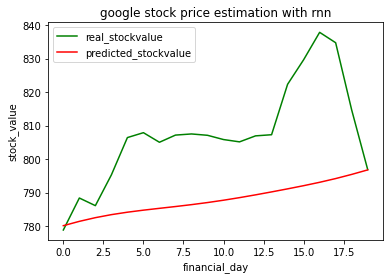

In [ ]:
# now ploting both trnds and compare them
plt.plot(test_data,color='green',label='real_stockvalue')
plt.plot(estimated_stockprice,color='red',label='predicted_stockvalue')
plt.title('google stock price estimation with rnn')
plt.xlabel('financial_day')
plt.ylabel('stock_value')
plt.legend()
plt.show()
# the above function show will show the plot